# Comparative study of different metaheurstics optimization algorithms using standard test functions
***

Topic : Global and non differentiable optimization algorithms : implementation of algorithms and comparative analysis of performance on benchmark set.\
Supervisor : Sylvain Benito (Exacture)\
Student : Adly Zaroui\
Due date : February, 2023

***
# Table of Content 

 - Functions definition
 - Algorithms definition
     - Simulated Annealing
     - Differential Evolution
     - Whale Optimization
     - Equilibrium Optimizer
 - Performance benchmark
 ***

In [ ]:
#------------------------------------------------------------------------------+

#   Adly Zaroui
#   A python3 notebook for metaheuristics benchmarkig using standard test functions
#   December, 2022

#------------------------------------------------------------------------------+

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

***
# Functions definiton

In [14]:
def Rastrigin(x,y):
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

def Rosenbrock(x,y):
    '''
    Rosenbrock function
    Minimum 0, reached at x = (1, ..., 1)
    Usually domain of evaluation is [-5, 10]^d
    Source: https://www.sfu.ca/~ssurjano/rosen.html
    '''
    dim = len(args)
    return sum([100*((y - x**2)**2) + (1-x)**2 for i in range(2)])

def Styblinski_Tang(args):
    '''
    Styblinski_Tang function
    Minimum -39.16599*d, reached at x = (-2.903534, ..., -2.903534)
    Usually domain of evaluation is [-5, 5]^d
    Source: https://www.sfu.ca/~ssurjano/stybtang.html
    '''
    dim = len(args)
    return  0.5*sum([xi**4 - 16*xi**2 + 5*xi for xi in args])

def perm(args, beta=1):
    '''
    Perm 0,d,beta function
    Minimum 0, reached at x = (1, 1/2, ..., 1/d), 
    Usually domain of evaluation is [-5, 5]^d
    Source: https://www.sfu.ca/~ssurjano/perm0db.html
    '''
    dim = len(args)
    return sum([sum([((j+beta)*(args[j]**(i+1) - 1/(j+1)**(i+1)))**2 for j in range(dim)]) for i in range(dim)])

def zakharov(args):
    '''
    Zakharov function
    Minimum 0, reached at x = (0, ..., O), 
    Usually domain of evaluation is [-5, 10]^d
    Note : has no local minima except the global one
    Source: https://www.sfu.ca/~ssurjano/zakharov.html
    '''
    dim = len(args)
    return sum([xi**2 for xi in args]) + sum([0.5*i*args[i-1] for i in range(1,dim+1)])**2 + sum([0.5*i*args[i-1] for i in range(1,dim+1)])**4


def bent_cigar(x): return x[0]**2 + 1e+6*sum(x**2)

def expandedSchafferf6(x):
    def g(x,y):
        return .5 + ( np.sin(np.sqrt(x**2 + y**2))**2 - .5 ) / (1 + 0.01*(x**2 + y**2)**2)
    return sum(g(x[i],x[i+1]) for i in range(len(x)-1)) + g(x[len(x-1)],x[len(x)])

class Schwefel:
    name = "Schwefel"
    separable = False

    @classmethod
    def __init__(self, d):
        self.d = d
        self.input_domain = np.array([[-100, 100] for _ in range(d)])

    def get_param(self):
        return {}

    def get_global_minimum(self):
        X = np.array([420.9687 for _ in range(self.d)])
        return (X, self(X))

    def __call__(self, X):
        return 418.9829*self.d-sum(X*np.sin(np.sqrt(np.abs(X))))

/var/folders/t5/101zpbvx5sgcdg0bpbr637qw0000gn/T/ipykernel_1166/2755643793.py:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


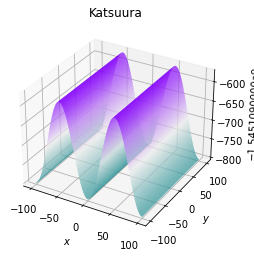

In [61]:
Rastrigin = lambda x,y: 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)
Schwefel = lambda x,y: 418.9829*2 - x*np.sin(np.sqrt(np.abs(x))) - y*np.sin(np.sqrt(np.abs(y)))

def Weierstrass(x, y, a=0.5, b=8, kmax=20):
    s = 0
    for k in range(kmax+1):
        s += a**k * np.cos(2*np.pi*b**k*x) * np.cos(2*np.pi*b**k*y)
    s *= 1 - a*np.cos(2*np.pi*b**kmax)
    return s

def lunacek_bi_rastrigin(x, y):
    dim = 2
    s = 1 - (1 / (2 * dim)) * (np.sum(x ** 2) - 10 * np.cos(2 * np.pi * x))
    term1 = -20 * np.exp(-0.2 * np.sqrt(1 / dim * np.sum(x ** 2))) - np.exp(1 / dim * np.sum(np.cos(2 * np.pi * x))) + 20 + np.exp(1)
    term2 = -20 * np.exp(-0.2 * np.sqrt(1 / dim * np.sum(y ** 2))) - np.exp(1 / dim * np.sum(np.cos(2 * np.pi * y))) + 20 + np.exp(1)
    return s * (term1 + term2)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
 
X = np.linspace(-100.5, 100.5, 200)
Y = np.linspace(-100.5, 100.5, 200)
X, Y = np.meshgrid(X, Y)

cmap = [(0, '#2f9599'), (0.45, '#eeeeee'), (1, '#8800ff')]
cmap = cm.colors.LinearSegmentedColormap.from_list('Custom', cmap, N=256)

Z = lunacek_bi_rastrigin(X,Y)
 
fig = plt.figure() 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cmap, linewidth=0.08,
  antialiased=True)
plt.title('Lunacek bi Rastrigin')
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.savefig('/Users/adly/Desktop/PFE/figures/lunacek_bi_rastrigin.png')
plt.show()

In [55]:
round(2.3)

2

***
# Simulated Annealing

> - Initialize state s
> - For $k = 0$ through $k_{\max}$ (exclusive) :
>    + $T := \mathrm{temperature}(1-k ∕ k_{\max})$
>    + Pick a random neighbour, $s_{\mathrm{new}} := \mathrm{neighbour}(s)$
>    + If $P(E(s), E(s_{\mathrm{new}}), T) \geq \mathrm{random}(0, 1)$:
>       * $s := s_{\mathrm{new}}$
> - Output: the final state $s$

In [2]:
# source : https://github.com/Naereen/notebooks/blob/master/Simulated_annealing_in_Python.ipynb
def simulated_annealing(cost_function,
              dim,
              interval,
              temperature,
              p,
              random_neighbour,
              maxsteps=1000,
              debug=False,
              show_progress=True):
    """ Optimize 'cost_function' using the simulated annealing algorithm."""
    
##############################################################################################################
#
#               cost_function : function to minimize -- must map from IR^n to IR, arg is a list
#               dim : integer -- dimension of cost_function
#               interval : list of tuples
#               temperature : function from [0,1] to IR
#               p : probability acceptance : (state, new_state, T) --> p(state, new_state, T)
#               random_neighbour : 
#               maxsteps : integer
#               debug : bool
#
##############################################################################################################
    assert dim == len(interval)
    
    import numpy as np
    rng = np.random.default_rng()
    state = [a + (b - a) * rng.random() for a,b in interval]
    cost = cost_function(state)
    states, costs = [state], [cost]
    
    if show_progress:
        from tqdm import tqdm
        for step in tqdm(range(maxsteps)):
        
            fraction = step / float(maxsteps)
        
            T = temperature(1-fraction)
        
            new_state = random_neighbour(state, interval, fraction)
            new_cost = cost_function(new_state)
        
            if debug: print("Step = " + str(step) + ", state = " + str(state) + ", cost = "
                        + str(cost) + ", new_state = " + str(new_state) + "\n")
                        
            if p(cost_function(state),cost_function(new_state),T) > rng.random():
                state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
        
        return state, cost_function(state), states, costs 
        
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(1-fraction)
        new_state = random_neighbour(state, interval, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step = " + str(step) + ", state = " + str(state) + ", cost = "
                        + str(cost) + ", new_state = " + str(new_state) + "\n")
        if p(cost_function(state),cost_function(new_state),T) > rng.random():
            state, cost = new_state, new_cost
        states.append(state)
        costs.append(cost)
    return state, cost_function(state), states, costs

In [ ]:
cost_function = Rastrigin
dim = 5
maxsteps = 1000
interval = [(-5.12,5.12) for i in range(dim)]
temperature = lambda x: max(0.01, min(1, 1 - x)) # Find a better temperature
p = lambda x,y,T: int(y < x) + np.exp(- (y - x) / T)*int(y >= x) # Metropolis acceptance

def random_neighbour(x, interval, fraction=1):
    """Move a little bit x, from the left or the right."""
    rng = np.random.default_rng()
    dim = len(x)
    amplitude = np.array([(max((a,b)) - min((a,b))) * fraction / 10 for a,b in interval])
    delta = (-amplitude/2.) + amplitude * rng.random(size = dim)
    clip = lambda x: [max(min(x, b), a) for (a,b),x in zip(interval,x)] # force x to be in the interval
    return clip(x + delta)

s_a_Rastrigin = simulated_annealing(cost_function, dim, interval, temperature, p, random_neighbour, maxsteps)
costs = s_a_Rastrigin[3]
state = s_a_Rastrigin[0]

plt.plot(range(maxsteps + 1),costs)
plt.title('Simlated Annealing Rastrigin, min = ' + str(min(costs)))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print(state)

In [ ]:
dim = 3
maxsteps = 10000
interval = [(-5, 10) for i in range(dim)] # Rosenbrock function accept all reals arguments

s_a_Rosenbrock = simulated_annealing(Rosenbrock, dim, interval, temperature, p, random_neighbour, maxsteps)
costs = s_a_Rosenbrock[3]
state = s_a_Rosenbrock[0]

plt.plot(range(maxsteps + 1),costs)
plt.title('Simulated Annealing Rosenbrock, min = ' + str(min(costs)))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print(state)

In [ ]:
dim = 3
maxsteps = 10000
interval = [(-5,5) for i in range(dim)] # Styblinski-Tang search domain

s_a_Styblinski_Tang = simulated_annealing(Styblinski_Tang, dim, interval, temperature, p, random_neighbour, maxsteps)
costs = s_a_Styblinski_Tang[3]
state = s_a_Styblinski_Tang[0]

plt.plot(range(maxsteps + 1),costs)
plt.title('Simulated Annealing Styblinski-Tang, min = ' + str(min(costs)))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print(state)

In [ ]:
dim = 7
maxsteps = 1000
interval = [(-100,100) for i in range(dim)]

s_a_perm = simulated_annealing(perm, dim, interval, temperature, p, random_neighbour, maxsteps)
costs = s_a_perm[3]
state = s_a_perm[0]

plt.plot(range(maxsteps + 1),costs)
plt.title('Simulated Annealing perm 0,d,beta, min = ' + str(min(costs)))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print(state)

In [ ]:
dim = 10
maxsteps = 10000
interval = [(-5, 10) for i in range(dim)] # Zakharov search domain

s_a_zakharov = simulated_annealing(zakharov, dim, interval, temperature, p, random_neighbour, maxsteps)
costs = s_a_zakharov[3]
state = s_a_zakharov[0]

plt.plot(range(maxsteps + 1),costs)
plt.title('Simulated Annealing Zakharov, min = ' + str(min(costs)))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print(state)

***
# Differential Evolution

> Initialize the population $X_i, \space (i = 1, 2, ..., n)$\
> Calculate the fitness of each individuals in the population
> - Repeat $N$ times :
>    + Create mutant vectors using *Eq (1)*
>    + Create trial vectors by recombining noisy vectors with parents vectors according to *Eq (2)*
>    + Calculate fitness of trial vectors
>    + Select winning vectors according to *Eq (3)* as individuals in the new generation

In [3]:
# source : https://github.com/nathanrooy/differential-evolution-optimization
def differential_evolution(cost_function,
                           dim,
                           interval,
                           initial_population,
                           mutate,
                           recombination,
                           maxsteps,
                           debug=False,
                           show_progress=True):
    
##############################################################################################################
#
#               cost_function : function to minimize -- must map from IR^n to IR, arg is a list
#               dim : integer -- dimension of cost_function
#               interval : list of tuples
#               popsize : integer
#               mutate : float
#               recombination : float in (0,1)
#               maxsteps : integer
#               show_progress : bool
#               debug : bool
#
##############################################################################################################
    
    clip = lambda x: [max(min(x, b), a) for (a,b),x in zip(interval,x)]
    import numpy as np
    rng = np.random.default_rng()
    assert dim == len(interval)

    population = initial_population
    popsize = len(population)
    gen_avg_scores = []
    costs = []

    if show_progress:
        from tqdm import tqdm
        for i in tqdm(range(maxsteps)):

            gen_scores = []

            # cycle through each individual in the population
            for j in range(popsize):
        
                #--- MUTATION (step #3.A) ---------------------+
            
                # select three random vector index positions [0, popsize), not including current vector j
                candidates = list(range(popsize))
                candidates.remove(j)
                random_index = rng.choice(candidates, 3, replace=False)

                x_1, x_2, x_3,  = population[random_index[0]], population[random_index[1]], population[random_index[2]]
                x_t = population[j] # target individual

                # subtract x3 from x2, and create a new vector (x_diff)
                x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2, x_3)]

                # multiply x_diff by the mutation factor (F) and add to x_1
                v_donor = [x_1_i + mutate * x_diff_i for x_1_i, x_diff_i in zip(x_1, x_diff)]
                v_donor = clip(v_donor)

                #--- RECOMBINATION (step #3.B) ----------------+

                v_trial = []
                for k in range(dim):
                    crossover = rng.uniform()
                    if crossover <= recombination:
                        v_trial.append(v_donor[k])
                    else:
                        v_trial.append(x_t[k])
                    
                #--- GREEDY SELECTION (step #3.C) -------------+

                score_trial  = cost_function(v_trial)
                score_target = cost_function(x_t)

                if score_trial < score_target:
                    population[j] = v_trial # replace indv by v_trial in population
                    gen_scores.append(score_trial)

                else:
                    gen_scores.append(score_target)


            gen_avg_scores.append(sum(gen_scores) / popsize)                         # current generation avg. fitness
            costs.append(min(gen_scores))                                  # fitness of best individual
            gen_sol = population[gen_scores.index(min(gen_scores))]     # solution of best individual
            state = gen_sol
            if debug:
                print ('generation : ' + str(i) + 
                       ', generation average cost : ' + str(gen_avg) + 
                       ', generation best cost : ' + str(gen_best), +
                       ', reached at candidate : ' + str(gen_sol) + '\n')
            
        return state, cost_function(state), costs

In [ ]:
cost_function = Rastrigin
dim = 3
interval = [(-5.12,5.12) for i in range(dim)]
popsize = 10
mutate = 0.5
recombination = 0.5
maxsteps = 100
rng = np.random.default_rng()
initial_population = [[rng.uniform(a,b) for a,b in interval] for i in range(popsize)]


d_e_rastrigin = differential_evolution(cost_function, dim, interval, initial_population, mutate, recombination, maxsteps)
costs = d_e_rastrigin[2]
state = d_e_rastrigin[0]

plt.plot(range(maxsteps),costs)
plt.title('Differential Evolution Rastrigin, min = ' + str(min(costs)))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print(state)

In [ ]:
cost_function = Rosenbrock
dim = 3
interval = [(-5,10) for i in range(dim)]
popsize = 10
mutate = 0.7
recombination = 0.5
maxsteps = 1000
rng = np.random.default_rng()
initial_population = [[rng.uniform(a,b) for a,b in interval] for i in range(popsize)]


d_e_rosenbrock = differential_evolution(cost_function, dim, interval, initial_population, mutate, recombination, maxsteps)
costs = d_e_rosenbrock[2]
state = d_e_rosenbrock[0]

plt.plot(range(maxsteps),costs)
plt.title('Differential Evolution Rosenbrock, min = ' + str(state))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [ ]:
cost_function = Styblinski_Tang
dim = 3
interval = [(-5,10) for i in range(dim)]
popsize = 10
mutate = 0.7
recombination = 0.5
maxsteps = 100
rng = np.random.default_rng()
initial_population = [[rng.uniform(a,b) for a,b in interval] for i in range(popsize)]


d_e_styblinski_tang = differential_evolution(cost_function, dim, interval, initial_population, mutate, recombination, maxsteps)
costs = d_e_styblinski_tang[2]
state = d_e_styblinski_tang[0]

plt.plot(range(maxsteps),costs)
plt.title('Differential Evolution Styblinski-Tang, min = ' + str(state))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

***
# Whale Optimization Algorithm

> Initialize the whales population $X_i, \space (i = 1, 2, ..., n)$\
> Calculate the fitness of each search agent\
> $X^*$ = the best search agent
> - Repeat $N$ times :
>  + **for each** search agent in the whales population 
>    + Update a, A, C, l, p
>     + **if** $|p|<0.5$
>       + **if** $|A|<1$
>         + Update the position of the current search agent by *Eq. (2.1)*
>       + **else**
>         + Select a random search agent $X_{rand}$
>         + Update the position of the current search agent by *Eq. (2.8)*
>       + **end if**
>     + **else**
>       + Update the position of the current search by *Eq. (2.5)*
>     + **end if**
>  + **end for**
>  + Check if any search agent goes beyond the search space and amend it
>  + Calculate the fitness of each search agent
>  + Update $X^*$ if there is a better solution
> - Output: $X^*$

In [4]:
# source : https://programstore.ir/wp-content/uploads/2019/07/WOA.pdf
def whale_optimization(cost_function,
                       dim,
                       interval,
                       initial_population,
                       maxsteps,
                       show_progress=True,
                       debug=False):
    
##############################################################################################################
#
#               cost_function : function to minimize -- must map from IR^n to IR, arg is a list
#               dim : integer -- dimension of cost_function
#               interval : list of tuples
#               initial_population : list of lists
#               maxsteps : integer
#               show_progress : bool
#               debug : bool
#
##############################################################################################################
    
    import numpy as np
    assert dim == len(interval)
    population = initial_population
    popsize = len(population)
    clip = lambda x: [max(min(x, b), a) for (a,b),x in zip(interval,x)]
    rng = np.random.default_rng()
    
    search_agent_scores = np.array([cost_function(whale) for whale in population])
    best_agent_idx = np.argmin(search_agent_scores)
    best_agent = np.array(population[best_agent_idx])
    best_score = cost_function(best_agent)
    
    pop_avg_scores = []
    costs = []
    
    if show_progress:
        from tqdm import tqdm
        for i in tqdm(range(maxsteps)):
            a = 2-2*i/maxsteps # linearly decreasing a from 2 to 0 over the course of i
            r = rng.uniform()
            A = 2*a*r-a
            C = 2*r
            l = 2*rng.uniform()-1
            p = rng.uniform()
        
            for j in np.setdiff1d(range(popsize),best_agent_idx): # for all agent except the best one
                agent = np.array(population[j])
            
            # Bubble-net attacking method (exploitation phase) ---+
                if p < 0.5: # shrinking encircling mechanism
                    D = np.abs(C*np.array(best_agent) - np.array(agent))
                    if np.abs(A) < 1:
                        population[j] = clip(best_agent - A*D)
                    else: # Search for prey (exploration phase) ---+
                        random_agent = rng.choice(population)
                        population[j] = clip(random_agent-A*D)
                else: # spiral model
                    D_prime = np.abs(best_agent - agent)
                    b = 1 # constant for defining the shape of the logarithmic spiral
                    population[j] = clip(D_prime*np.exp(b*l) * np.cos(2*np.pi*l) * best_agent)

                search_agent_scores = [cost_function(whale) for whale in population]
                best_current_score = min(search_agent_scores)
                if best_current_score < cost_function(best_agent):
                    best_agent_idx = np.argmin(search_agent_scores)
                    best_agent = np.array(population[best_agent_idx])
                    best_score = cost_function(best_agent)
                    if debug: print('best search_agent so far: ' + str(best_score) + '\n')
        
            pop_avg_scores.append(np.mean(search_agent_scores)) # current generation avg. fitness
            costs.append(best_score)                            # fitness of the best individual
            
        return best_agent, cost_function(best_agent), costs
    
    for i in range(maxsteps):
        a = 2-2*i/maxsteps
        r = rng.uniform()
        A = 2*a*r-a
        C = 2*r
        l = 2*rng.uniform()-1
        p = rng.uniform()
        for j in np.setdiff1d(range(popsize),best_agent_idx):
            agent = np.array(population[j])
            if p < 0.5:
                D = np.abs(C*np.array(best_agent) - np.array(agent))
                if np.abs(A) < 1:
                    population[j] = clip(best_agent - A*D)
                    random_agent = rng.choice(population)
                    population[j] = clip(random_agent-A*D)
            else:
                D_prime = np.abs(best_agent - agent)
                b = 1
                population[j] = clip(D_prime*np.exp(b*l) * np.cos(2*np.pi*l) * best_agent)
            search_agent_scores = [cost_function(whale) for whale in population]
            best_current_score = min(search_agent_scores)
            if best_current_score < cost_function(best_agent):
                best_agent_idx = np.argmin(search_agent_scores)
                best_agent = np.array(population[best_agent_idx])
                best_score = cost_function(best_agent)
                if debug: print('best search agent so far: ' + str(best_score) + '\n')
        pop_avg_scores.append(np.mean(search_agent_scores))
        costs.append(best_score)
    return best_agent, cost_function(best_agent), costs

In [ ]:
cost_function = Rastrigin
dim = 100
interval = [(-5.12,5.12) for i in range(dim)]
popsize = 3
maxsteps = 20
rng = np.random.default_rng()
initial_population = [[rng.uniform(a,b) for a,b in interval] for i in range(popsize)]


w_o_Rastrigin = whale_optimization(cost_function,
                       dim,
                       interval,
                       initial_population,
                       maxsteps)
costs = w_o_Rastrigin[2]
state = w_o_Rastrigin[0]

plt.plot(range(maxsteps),costs)
plt.title('Whale Optimization Rastrigin, min = ' + str(min(costs)))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print(state)

In [ ]:
cost_function = Rosenbrock
dim = 100
interval = [(-5,10) for i in range(dim)]
popsize = 3
maxsteps = 40
rng = np.random.default_rng()
initial_population = [[rng.uniform(a,b) for a,b in interval] for i in range(popsize)]


w_o_Rosenbrock = whale_optimization(cost_function,
                       dim,
                       interval,
                       initial_population,
                       maxsteps)
costs = w_o_Rosenbrock[2]
state = w_o_Rosenbrock[0]

plt.plot(range(maxsteps),costs)
plt.title('Whale Optimization Rosenbrock, min = ' + str(min(costs)))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print(state)

***
# Equilibrium Optimizer

> Initialize the particles population $X_i, \space (i = 1, 2, ..., n)$\
> Assign equilibrium candidates fitness a large number\
> Assign free parameters $a_1 = 2, a_2 = 1, GP = 0.5$
> - Repeat $N$ times :
>  + **For** i = 1 to n (number of particles)
>    + Calculate fitness of the $i^{th}$ particle
>     + **If** $fit(\vec{C}_i) < fit(\vec{C}_{eq \space 1})$
>      + replace $\vec{C}_{eq \space 1}$ with $\vec{C}_i$ and $fit(\vec{C}_{eq \space 1})$ with $fit(\vec{C}_i)$
>     + **Elseif** $fit(\vec{C}_i) > fit(\vec{C}_{eq \space 1})$ & $fit(\vec{C}_i) < fit(\vec{C}_{eq \space 2})$
>      + replace $\vec{C}_{eq \space 2}$ with $\vec{C}_i$ and $fit(\vec{C}_{eq \space 2})$ with $fit(\vec{C}_i)$
>     + **Elseif** $fit(\vec{C}_i) > fit(\vec{C}_{eq \space 1})$ & $fit(\vec{C}_i) < fit(\vec{C}_{eq \space 2})$ & $fit(\vec{C}_i) < fit(\vec{C}_{eq \space 3})$
>      + replace $\vec{C}_{eq \space 3}$ with $\vec{C}_i$ and $fit(\vec{C}_{eq \space 3})$ with $fit(\vec{C}_i)$
>     + **Elseif** $fit(\vec{C}_i) > fit(\vec{C}_{eq \space 1})$ & $fit(\vec{C}_i) < fit(\vec{C}_{eq \space 2})$ & $fit(\vec{C}_i) > fit(\vec{C}_{eq \space 3})$ & $fit(\vec{C}_i) < fit(\vec{C}_{eq \space 4})$
>      + replace $\vec{C}_{eq \space 4}$ with $\vec{C}_i$ and $fit(\vec{C}_{eq \space 4})$ with $fit(\vec{C}_i)$
>     + **End If**
>  + **End For**
>  + $C_{eq \space ave} = \frac{\vec{C}_{eq \space 1} \space + \space \vec{C}_{eq \space 2} \space + \space \vec{C}_{eq \space 3} \space + \space \vec{C}_{eq \space 4}}{4}$
>  + construct the equilibrium pool $\vec{C}_{eq \space pool} = \{\vec{C}_{eq \space 1}, \space \vec{C}_{eq \space 2}, \space \vec{C}_{eq \space 3}, \space \vec{C}_{eq \space 4}, \space \vec{C}_{eq \space ave}\}$
>  + Accomplish memory saving (If iter > 1)
>  + Assign $t = (1 - \frac{i}{N})^{a_{2}\frac{i}{N}}$
>  + **For** i = 1 to n
>    + Randomly choose one candidate from the equilibrium pool
>    + Generate random vectors $\vec{\lambda}, \space \vec{r}$ from Eq (11)
>    + Construct $\vec{F} = a_{1}sign(\vec{r}-0.5)(e^{-\vec{\lambda}t}-1)$
>    + Construct $\vec{GCP} = 0.5\vec{r_{1}}\mathbb{1}_{r_{2} \geq GP}$, where $r_1$ and $r_2$ are randomly generated numbers in $[0,1]$
>    + Construct $\vec{G_0} = \vec{GCP}(\vec{C_{eq}} - \vec{\lambda}\vec{C})$
>    + Construct $\vec{G} = \vec{G_0}.\vec{F}$
>    + Update concentrations $\vec{C} = \vec{C_{eq}} + (\vec{C}-\vec{C_{eq}}).\vec{F} + \frac{\vec{G}}{\vec{\lambda}V}(1-\vec{F})$
>  + **End For**
> - Output: 

In [42]:
# source https://www.sciencedirect.com/science/article/pii/S0950705119305295
def equilibrium_optimizer(cost_function,
                          dim,
                          interval,
                          initial_population,
                          maxIter,
                          show_progress=True,
                          debug=False):
    
##############################################################################################################
#
#               cost_function : function to minimize -- must map from IR^n to IR, arg is a list
#               dim : integer -- dimension of cost_function
#               interval : list of tuples
#               initial_population : list of lists
#               maxIter : integer
#               show_progress : bool
#               debug : bool
#
##############################################################################################################
    
    import numpy as np
    assert dim == len(interval)
    particles = initial_population
    a1, a2, GP, V = 2, 1, .5, 1
    popsize = len(particles)
    clip = lambda x: [max(min(x, b), a) for (a,b),x in zip(interval,x)]
    rng = np.random.default_rng()
    
    particles = sorted(particles, key = cost_function)
    C_eq1, C_eq2, C_eq3, C_eq4 = particles[:4] # selection of the 4 particles with the smallest fitness value
        
    particles_concentrations = np.array([cost_function(particle) for particle in particles])
    costs = []
    
    # equilibrium pool constuction 
    C_av = np.mean((C_eq1, C_eq2, C_eq3, C_eq4), axis=0)
    C_eq_pool = {tuple(C_eq1), tuple(C_eq2), tuple(C_eq3), tuple(C_eq4), tuple(C_av)}
    
    if show_progress:
        from tqdm import tqdm
        for iter in tqdm(range(maxIter)):

            for particle in particles:
                if cost_function(particle)<cost_function(C_eq1):
                    C_eq1 = particle
                elif cost_function(particle)>cost_function(C_eq1) and cost_function(particle)<cost_function(C_eq2):
                    C_eq2 = particle
                elif cost_function(particle)>cost_function(C_eq1) and cost_function(particle)<cost_function(C_eq2) and cost_function(particle)<cost_function(C_eq3):
                    C_eq3 = particle
                elif cost_function(particle)>cost_function(C_eq1) and cost_function(particle)<cost_function(C_eq2) and cost_function(particle)<cost_function(C_eq3) and cost_function(particles)<cost_function(C_eq4):
                    C_eq4 = particle          

            C_av = np.mean((C_eq1, C_eq2, C_eq3, C_eq4), axis=0)
            C_eq_pool = {tuple(C_eq1), tuple(C_eq2), tuple(C_eq3), tuple(C_eq4), tuple(C_av)}
            costs.append(cost_function(C_eq1))
        
#-------------Memory saving------------------+
            if iter==0: particles_old, particles_concentrations_old = particles, particles_concentrations
    
            for i in range(popsize):
                if particles_concentrations_old[i] < particles_concentrations[i]:
                    particles_concentrations[i] = particles_concentrations_old[i]
                    particles[i] = particles_old_old[i]

            particles_old, particles_concentrations_old = particles, particles_concentrations
#--------------------------------------------+

            t = (1-iter/maxIter)**(a2-iter/maxIter)               # (Eq 9)
        
            for i in range(popsize):
                C_eq = rng.choice(list(C_eq_pool))
                lbda = rng.uniform(size=dim)               # Generate lbda, r, according to (Eq 11)
                r = rng.uniform(size=dim)
                F = a1*np.sign(r - .5) * (np.exp(-lbda * t) - 1)
                r1, r2 = rng.uniform(size=2)
                GCP = .5*r1*int(r2>=GP)
                G0 = GCP*(C_eq-lbda*particles[i])
                G = G0*F
                particles[i] = clip(C_eq + (particles[i]-C_eq)*F + (G/lbda*V)*(1-F)) # (Eq 16)
        
        return C_eq1, cost_function(C_eq1), costs
    
    
    for iter in range(maxIter):
        for particle in particles:
            if cost_function(particle)<cost_function(C_eq1):
                C_eq1 = particle
            elif cost_function(particle)>cost_function(C_eq1) and cost_function(particle)<cost_function(C_eq2):
                C_eq2 = particle
            elif cost_function(particle)>cost_function(C_eq1) and cost_function(particle)<cost_function(C_eq2) and cost_function(particle)<cost_function(C_eq3):
                C_eq3 = particle
            elif cost_function(particle)>cost_function(C_eq1) and cost_function(particle)<cost_function(C_eq2) and cost_function(particle)>cost_function(C_eq3) and cost_function(particles)<cost_function(C_eq4):
                C_eq4 = particle          
        C_av = np.mean((C_eq1, C_eq2, C_eq3, C_eq4), axis=0)
        C_eq_pool = {tuple(C_eq1), tuple(C_eq2), tuple(C_eq3), tuple(C_eq4), tuple(C_av)}
        costs.append(cost_function(C_eq1))
        if iter==0: particles_old, particles_concentrations_old = particles, particles_concentrations
        for i in range(popsize):
            if particles_concentrations_old[i] < particles_concentrations[i]:
                particles_concentrations[i] = particles_concentrations_old[i]
                particles[i] = particles_old_old[i]
        particles_old, particles_concentrations_old = particles, particles_concentrations
        t = (1-iter/maxIter)**(a2-iter/maxIter)
        for i in range(popsize):
            C_eq = rng.choice(list(C_eq_pool))
            lbda = rng.uniform(size=dim)
            r = rng.uniform(size=dim)
            F = a1*np.sign(r - .5) * (np.exp(-lbda * t) - 1)
            r1, r2 = rng.uniform(size=2)
            GCP = .5*r1*int(r2>=GP)
            G0 = GCP*(C_eq-lbda*particles[i])
            G = G0*F
            particles[i] = C_eq + (particles[i]-C_eq)*F + (G/lbda*V)*(1-F) # (Eq 16)
    return C_eq1, cost_function(C_eq1), costs
    

In [ ]:
cost_function = Rastrigin
dim = 9
interval = [(-5.12,5.12) for i in range(dim)]
popsize = 5
maxsteps = 1000
rng = np.random.default_rng()
initial_population = [[rng.uniform(a,b) for a,b in interval] for i in range(popsize)]


e_o_Rastrigin = equilibrium_optimizer(cost_function,
                          dim,
                          interval,
                          initial_population,
                          maxIter=maxsteps,
                          show_progress=True,
                          debug=False)

costs = e_o_Rastrigin[2]
state = e_o_Rastrigin[0]

plt.plot(range(maxsteps),costs)
plt.title('Equilibrium Optimizer Rastrigin, min = ' + str(min(costs)))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print(state)

In [ ]:
cost_function = Rosenbrock
dim = 9
interval = [(-5,10) for i in range(dim)]
popsize = 5
maxsteps = 100
rng = np.random.default_rng()
initial_population = [[rng.uniform(a,b) for a,b in interval] for i in range(popsize)]


e_o_Rosenbrock = equilibrium_optimizer(cost_function,
                          dim,
                          interval,
                          initial_population,
                          maxIter=maxsteps,
                          show_progress=True,
                          debug=False)

costs = e_o_Rosenbrock[2]
state = e_o_Rosenbrock[0]

plt.subplot(1,2,1)
plt.plot(range(maxsteps),costs)
plt.xlabel('iterations')
plt.ylabel('cost')

plt.subplot(1,2,2)
plt.plot(np.log(range(1,maxsteps)),np.log([max(cost,1e-8) for cost in costs[1:]]))
plt.xlabel('log iterations')
plt.ylabel('log cost')

plt.title('Equilibrium Optimizer Rosenbrock, min = ' + str(min(costs)))
plt.tight_layout(w_pad=2)
plt.show()

print(state)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 504.35it/s]


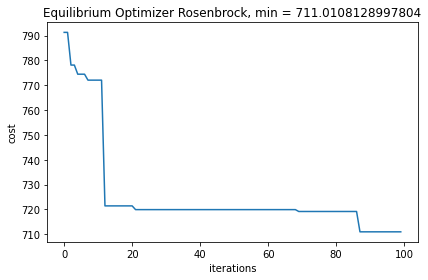

[64.66159359107205, 66.80910966774283]


In [46]:
import numpy as np
import matplotlib.pyplot as plt
popsize = 5
dim = 2
maxsteps = 100
cost_function = Schwefel(dim)
rng = np.random.default_rng()
initial_population = [[rng.uniform(a,b) for a,b in cost_function.input_domain] for i in range(popsize)]


e_o_S = equilibrium_optimizer(cost_function,
                          dim,
                          cost_function.input_domain,
                          initial_population,
                          maxIter=maxsteps,
                          show_progress=True,
                          debug=False)

costs = e_o_S[2]
state = e_o_S[0]

plt.plot(range(maxsteps),costs)
plt.xlabel('iterations')
plt.ylabel('cost')

plt.title('Equilibrium Optimizer Rosenbrock, min = ' + str(min(costs)))
plt.tight_layout(w_pad=2)
plt.show()

print(state)

In [16]:
cost_function(np.array([688.54499723,4.063356]))

218.36749741288975

***
# Evaluation

Methodology :
For each function and each algorithm, we will run 25 executions and keep min, max, sd of the final cost_function valaue, computing time, number of cost_function calls

In [ ]:
from tqdm import tqdm

# ------------------ Simulated Annealing Environment ------------------+

dim = 12
maxsteps = 1000
temperature = lambda x: max(0.01, min(1, 1 - x))
p = lambda x,y,T: int(y < x) + np.exp(- (y - x) / T)*int(y >= x) # Metropolis acceptance

def random_neighbour(x, interval, fraction=1):
    """Move a little bit x, from the left or the right."""
    rng = np.random.default_rng()
    dim = len(x)
    amplitude = np.array([(max((a,b)) - min((a,b))) * fraction / 10 for a,b in interval])
    delta = (-amplitude/2.) + amplitude * rng.random(size = dim)
    clip = lambda x: [max(min(x, b), a) for (a,b),x in zip(interval,x)] # force x to be in the interval
    return clip(x + delta)

def SA_evaluation(optimizer,cost_function, dim, interval, temperature, p, random_neighbour, maxsteps):
    costs = []
    for i in tqdm(range(25)):
        s_a_Rastrigin = optimizer(cost_function, dim, interval, temperature, p, random_neighbour, maxsteps, show_progress=False)
        cost = s_a_Rastrigin[3][-1]
        costs.append(cost)
    return min(costs), max(costs), np.std(costs)

In [ ]:
cost_function = Rastrigin
interval = [(-5.12,5.12) for i in range(dim)]
SA_evaluation(simulated_annealing,cost_function,dim,interval,temperature,p,random_neighbour,maxsteps)
# ------------------------------------------------------------------------------------------------------------

cost_function = Rosenbrock
interval = [(-5, 10) for i in range(dim)]
SA_evaluation(simulated_annealing,cost_function,dim,interval,temperature,p,random_neighbour,maxsteps)
# ------------------------------------------------------------------------------------------------------------

cost_function = Styblinski_Tang
interval = [(-5,5) for i in range(dim)]
SA_evaluation(simulated_annealing,cost_function,dim,interval,temperature,p,random_neighbour,maxsteps)
# ------------------------------------------------------------------------------------------------------------

cost_function = perm
interval = [(-5,5) for i in range(dim)]
SA_evaluation(simulated_annealing,cost_function,dim,interval,temperature,p,random_neighbour,maxsteps)
# ------------------------------------------------------------------------------------------------------------

cost_function = perm
interval = [(-5,5) for i in range(dim)]
SA_evaluation(simulated_annealing,cost_function,dim,interval,temperature,p,random_neighbour,maxsteps)
# ------------------------------------------------------------------------------------------------------------

cost_function = zakharov
interval = [(-5, 10) for i in range(dim)]
SA_evaluation(simulated_annealing,cost_function,dim,interval,temperature,p,random_neighbour,maxsteps)
# ------------------------------------------------------------------------------------------------------------

In [50]:
np.array(sorted(np.array([1,2,3]), key = lambda x: x))

array([1, 2, 3])